In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
attacks_month = pd.read_csv('attacks_with_month.csv')

In [3]:
attacks_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4474 entries, 0 to 4473
Data columns (total 19 columns):
Unnamed: 0                4474 non-null int64
Case Number               4474 non-null object
Date                      4474 non-null object
Year                      4474 non-null int64
Type                      4474 non-null object
Country                   4474 non-null object
Area                      4474 non-null object
Location                  4474 non-null object
Activity                  4474 non-null object
Name                      4474 non-null object
Sex                       4215 non-null object
Age                       4474 non-null float64
Injury                    4474 non-null object
Is_Fatal                  4474 non-null object
Time                      2579 non-null object
Species                   2592 non-null object
Investigator or Source    4474 non-null object
col                       4474 non-null object
Month                     4474 non-null int64
dt

In [4]:
#Drop Time and Species 
attacks_month = attacks_month.drop(['Unnamed: 0','Time','Species '],axis=1)

In [5]:
attacks_month = attacks_month.dropna(axis=0)

In [6]:
#Chi square for contingency tests(First some bucketing needs to be done)
len(attacks_month['Activity'].unique().tolist())

1029

In [7]:
attacks_month['Activity'].value_counts()

Surfing                                                                     848
Swimming                                                                    686
Fishing                                                                     256
Spearfishing                                                                252
Wading                                                                      131
                                                                           ... 
Scuba diving & spearfishing                                                   1
Shipwrecked pearling schooner                                                 1
Spearfishing, free diving, possibly ascended into path of cruising shark      1
Swimming with other crew near wharf                                           1
Playing on a sandbar                                                          1
Name: Activity, Length: 1029, dtype: int64

In [8]:
attacks_month = attacks_month.replace({'Scuba diving':'Diving','Free diving':'Diving','Pearl diving':'diving','Freediving':'Diving'})

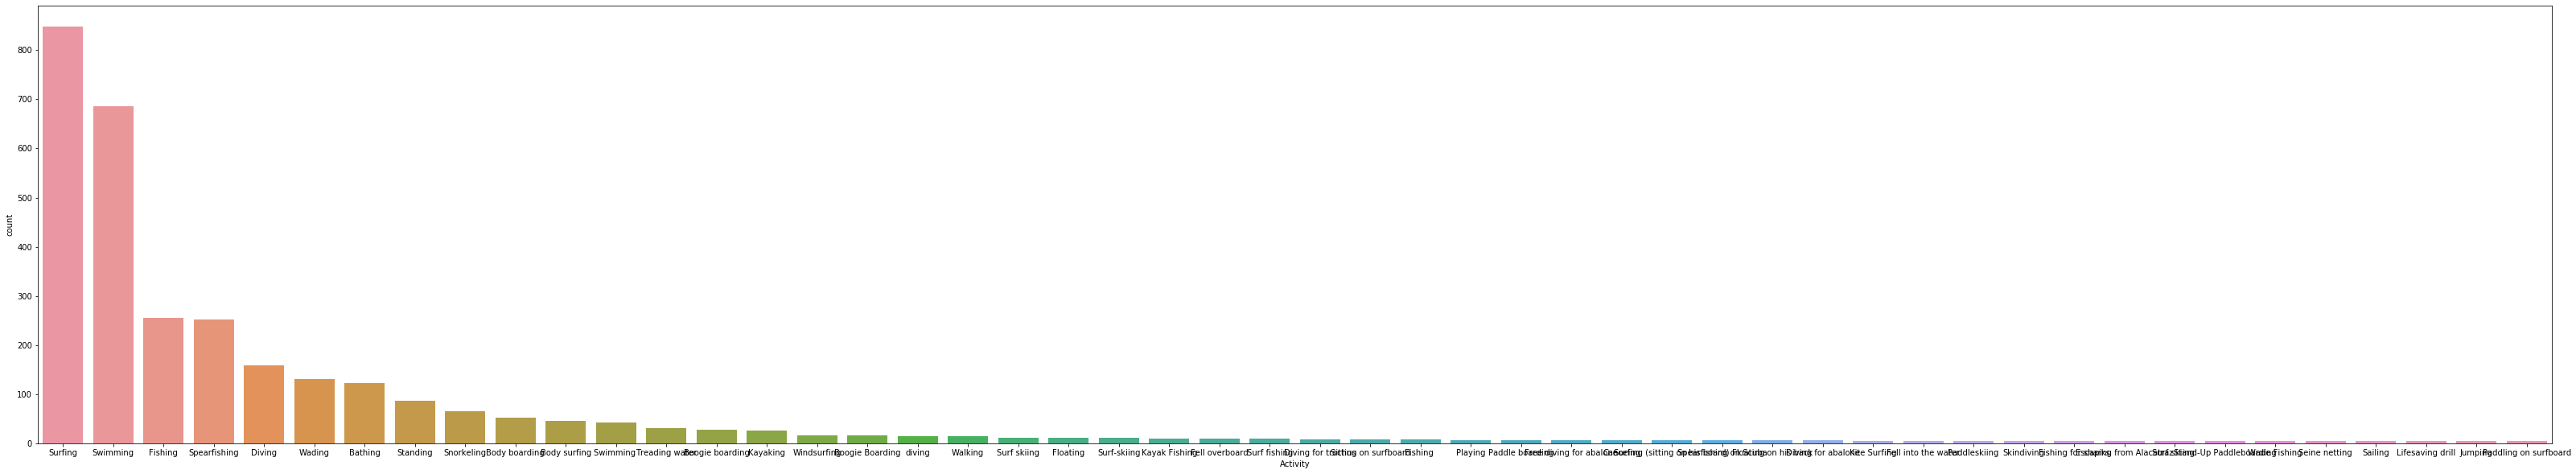

In [9]:
plt.figure(figsize=(56,10 ))
sns.countplot(x='Activity',data=attacks_month,order=attacks_month.Activity.value_counts().iloc[:50].index)



In [10]:
activity = []
for i in attacks_month['Activity']:
    activity.append(i.split(" ")[0])


In [11]:
activity

['Surfing',
 'Surfing',
 'Surfing',
 'Surfing',
 'Surfing',
 'Wading',
 'Swimming',
 'Kite',
 'Boogie',
 'Surfing',
 'Body',
 'Spearfishing',
 'Surfing',
 'Surfing',
 'Wading',
 'Snorkeling',
 'SUP',
 'Surfing',
 'Swimming',
 'Kayaking',
 'Lobstering',
 'Surfing',
 'Surfing',
 'Surfing',
 'Spearfishing',
 'Fishing',
 'Surfing',
 'Swimming',
 'Wading',
 'Fishing',
 'Fishing',
 'Fishing',
 'Swimming',
 'Fishing',
 'Surfing',
 'Spearfishing',
 'Floating',
 'Wading',
 'Surfing',
 'Spearfishing',
 'Floating',
 'Standing',
 'Surfing',
 'Swimming',
 'Diving',
 'Swimming',
 'Surfing',
 'Swimming',
 'Swimming',
 'Swimming',
 'Swimming',
 'Swimming',
 'Swimming',
 'Teasing',
 'Floating',
 'Fishing',
 'Surfing',
 'Surfing',
 'Surf-skiing',
 'Swimming',
 'Spearfishing',
 'Spearfishing',
 'Walking',
 'SUP',
 'Snorkeling',
 'Surfing',
 'Surfing',
 'Body',
 'Fishing',
 'Swimming',
 'Kite',
 'Spearfishing',
 'Wading',
 'Feeding',
 'Surfing',
 'Walking',
 'Windsurfing',
 'Surfing',
 'Surfing',
 'Spearf

In [12]:
#appending this new activity to dataframe
attacks_month['Activity_new'] = activity

In [13]:
attacks_month['Activity_new'].nunique()

296

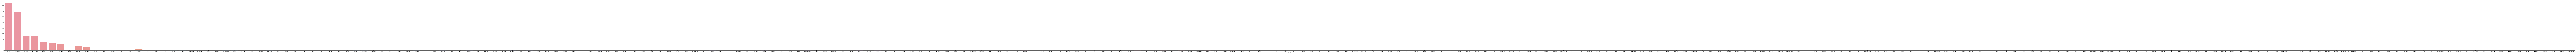

In [14]:
plt.figure(figsize=(500,10))
sns.countplot(x='Activity',data=attacks_month,order=attacks_month.Activity_new.value_counts().iloc[:296].index)


In [15]:
attacks_month = attacks_month.replace({'Boogie':'Boogie boarding','Body':'Bodyboarding','Free':'Diving','Surf':'Surfing'
                                      ,'Fishing,':'Fishing','Scuba':'Diving','Walking':'Wading','Spearfishing,':'Spearfishing',
                                      'Swimming,':'Swimming','Windsurfing':'Surfing','diving':'Diving',
                                       'Surfing,':'Surfing','Dived':'Diving','Kayak':'Kayaking','Skindiving':'Diving','Diving,':'Diving',
                                      'SCUBA':'Diving','Spearing':'Spearfishing','Freediving':'Diving','Snorkeling,':'Snorkeling',
                                      'Wading,':'Wading','Body-boarding':'Bodyboarding','Canoe':'Canoeing','Pearl':'Diving','Wade-fishing':'Wading',
                                      'Diving?':'Diving','fishing':'Fishing','Skindiving,':'Diving','bathing':'Bathing','Wading?':'Wading',
                                      'Boogie-boarding':'Boogie boarding','Surf-fishing':'Fishing','Google-diving':'Diving','Bodysurfing':'Surfing',
                                      'Fisherman':'Fishing','Windsurfing,':'Surfing','Batin':'Bathing','Swimming.':'Swimming','"Swimming':'Swimming',
                                      'Diving.':'Diving','Freediving,':'Diving','Speared':'Spearfishing','Free-diving':'Diving'
                                      ,'Body':'Bodyboarding'})

In [16]:
attacks_month['Activity_new'].nunique()

255

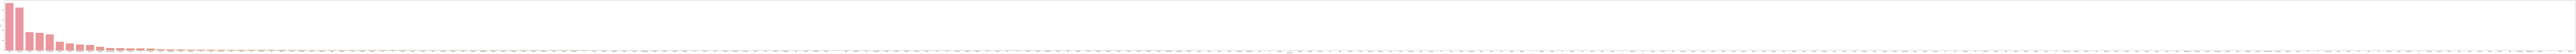

In [17]:
plt.figure(figsize=(500,10))
sns.countplot(x='Activity_new',data=attacks_month,order=attacks_month.Activity_new.value_counts().iloc[:255].index)

In [18]:
attacks_month = attacks_month.replace({'Fell':'Standing','Treading':'Wading','Surf-skiing':'Surfing','Jumped':'Standing',
                                       'Paddle':'Swimming','Sea':'Swimming','Splashing':'Swimming','Wade':'Wading',
                                       'Collecting':'Wading','Washing':'Wading','Jumping':'Standing','Escaping':'Swimming',
                                       'Hunting':'Fishing','Standing,':'Standing','Catching':'Fishing','Stand-Up':'Standing',
                                       'Cleaning':'Wading','Netting':'Fishing','Crayfishing':'Fishing','Net':'Fishing','Wakeboarding':'Bodyboarding',
                                       'Board':'Bodyboarding','Paddle-surfing':'Surfing','Google-diving':'Diving','Paddling':'Swimming','boat':'Boating',
                                       'Rowing':'Boating','Standing,':'Standing',})


In [19]:
attacks_month['Activity_new'].nunique()

229

In [20]:
activities = attacks_month.groupby('Activity_new').size()

In [21]:
activities = activities[activities>20]

In [22]:
activities = activities.to_frame()
activities 

,0
Activity_new,
Bathing,138
Bodyboarding,119
Boogie boarding,48
Diving,347
Fishing,376
Floating,38
Kayaking,44
Playing,21
Snorkeling,72


In [23]:
activities = activities.rename(columns={0:'Count'})

In [24]:
activities

,Count
Activity_new,
Bathing,138
Bodyboarding,119
Boogie boarding,48
Diving,347
Fishing,376
Floating,38
Kayaking,44
Playing,21
Snorkeling,72


In [25]:
attacks_month = pd.merge(attacks_month, activities, on='Activity_new')

In [26]:
attacks_month

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Is_Fatal,Investigator or Source,col,Month,Activity_new,Count
0,2016.09.18.c,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16.000000,Minor injury to thigh,N,"Orlando Sentinel, 9/19/2016",2016.09.18.c,9,Surfing,949
1,2016.09.18.b,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36.000000,Lacerations to hands,N,"Orlando Sentinel, 9/19/2016",2016.09.18.b,9,Surfing,949
2,2016.09.18.a,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43.000000,Lacerations to lower leg,N,"Orlando Sentinel, 9/19/2016",2016.09.18.a,9,Surfing,949
3,2016.09.17,17-Sep-2016,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,27.068581,Struck by fin on chest & leg,N,"The Age, 9/18/2016",2016.09.17,9,Surfing,949
4,2016.09.15,16-Sep-2016,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,27.068581,No injury: Knocked off board by shark,N,"The Age, 9/16/2016",2016.09.15,9,Surfing,949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,1841.03.27,27-Mar-1841,1841,Unprovoked,AUSTRALIA,New South Wales,"Cockatoo Island, Sydney",Bathing,Andrew Goggin,M,27.068581,FATAL,Y,"Sydney Gazette, 4/27/1841",1841.03.27,3,Bathing,138
3756,1837.09.03,09-Sep-1837,1837,Unprovoked,USA,South Carolina,"Magwoods Wharf, Charleston Harbor, Charleston ...",Bathing,a young boy from the Plymouth,M,27.068581,Right foot bittten,N,"C. Creswell, GSAF; J. Hair, pp.65-66",1837.09.03,9,Bathing,138
3757,1835.02.21.R,Reported 21-Feb-1835,1835,Unprovoked,VANUATU,Sanma Province,"Bay of Yago, Espiritu Santo Island",Bathing,John McKeig,M,27.068581,FATAL,Y,"Sydney Gazette, 2/21/1835",1835.02.21.R,2,Bathing,138
3758,1832.01.23.R,Reported 23-Jan-1832,1832,Unprovoked,AUSTRALIA,New South Wales,Sydney,Bathing,male,M,27.068581,Laceration to leg,N,"Sydney Herald, 1/23/1832",1832.01.23.R,1,Bathing,138


In [27]:
attacks_month.to_csv('attacks_cleaned_activity.csv')